<h2 style="text-align:center;">Welcome to the fourth laboratory work in this course</h2>
<h4 style="text-align:center;">This laboratory work is graded</h4>

<span style="color:#011f4b; font-size:15px"><b>The goal</b> of the laboratory work - is to start data preprocessing process 
<br/>
<b>Learning outcomes:</b>
* to be able to explore data distributions
* to handle missing values
</span>
<br/><br/>
<span style="color:#011f4b;">
Your task is to complete this laboratory work within 80 minutes and submit the .ipynb file to DL "Laboratory03". 
<br/>
<b>Pay attention to the file name - your file should be named as "Laboratory_work_04_Yoursurname_YourName_yourgroup".</b> In case you didn't name your file properly (as showed before) <b>-5% penalty</b> will be applied.
</span>

<hr>

<span style="color:#011f4b">Because data is often taken from multiple sources which are normally not too reliable and that too in different formats, more than half our time is consumed in dealing with data quality issues when working on a machine learning problem. It is simply unrealistic to expect that the data will be perfect. There may be problems due to human error, limitations of measuring devices, or flaws in the data collection process.

<span style="color:#011f4b"><b> <b><span style="font-size:20px; color:orange">T</span>his laboratory class is focused on your individual work</b>. So you will not be provided with examples, almost.
    <span style="color:#00a0e5"> Данная лабораторная работа более самостоятельная</span>
<br/><br/>
Now, let's go to practice </span>

<b>First things first,</b> import <code><b>matplotlib</b></code>, <code><b>pandas</b></code> and <code><b>numpy</b></code>packages to your notebook. 
<br/> Simply uncomment the cell below:

<p style="text-align:right; color:#1460AA;">+2
    points </p>

In [1]:
# Run this cell - Запустите эту ячейку SHFT+Enter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<b>Inline</b> your matplotlib

In [2]:
#Run this cell - Запустите эти ячейки SHFT+Enter
%matplotlib inline

<p style="text-align:right; color:#1460AA;">+2
    points </p>

In [3]:
# Run this cell - Запустите эти ячейки SHFT+Enter
dataset = pd.read_csv("House_prices.csv")
dataset.head(10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,Neighborhood,HouseStyle,OverallQual,...,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,PoolArea,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,CollgCr,2Story,7,...,Ex,Y,SBrkr,856,854,3,1,0,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,Veenker,1Story,6,...,Ex,Y,SBrkr,1262,0,3,1,0,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,CollgCr,2Story,7,...,Ex,Y,SBrkr,920,866,3,1,0,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Crawfor,2Story,7,...,Gd,Y,SBrkr,961,756,3,1,0,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,NoRidge,2Story,8,...,Ex,Y,SBrkr,1145,1053,4,1,0,Normal,250000
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Mitchel,1.5Fin,5,...,Ex,Y,SBrkr,796,566,1,1,0,Normal,143000
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Somerst,1Story,8,...,Ex,Y,SBrkr,1694,0,3,1,0,Normal,307000
7,60,RL,10382,Pave,IR1,Lvl,AllPub,NWAmes,2Story,7,...,Ex,Y,SBrkr,1107,983,3,1,0,Normal,200000
8,50,RM,6120,Pave,Reg,Lvl,AllPub,OldTown,1.5Fin,7,...,Gd,Y,FuseF,1022,752,2,2,0,Abnorml,129900
9,190,RL,7420,Pave,Reg,Lvl,AllPub,BrkSide,1.5Unf,5,...,Ex,Y,SBrkr,1077,0,2,2,0,Normal,118000


So, here we see that you will work with dataset about House Prices and conditions. (<span style="color:#00a0e5">Сегодня вы работаете с данными о продаже домов и их состояния а момент продажи</span>)

Here, you can see the description for this dataset (<span style="color:#00a0e5">Для понимания здесь вы найдете описание фич</span>)

* SalePrice: the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotArea: Lot size in square feet
* Street: Type of road access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* Neighborhood: Physical locations within Ames city limits
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* ExterQual: Exterior material quality
* Foundation: Type of foundation
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* BedroomAbvGr: Number of bedrooms above garage
* KitchenAbvGr: Number of kitchens above garage
* PoolArea: Pool area in square feet
* SaleCondition: Condition of sale

<h3>TASK 1: Data observation </h3>

<b>Task 1.1 </b> Take a closer look to your column values. Use <code>dataset.info()</code> (<span style="color:#00a0e5"> Самое время понять с какими данными вы будете работать, используйте указанные методы чтобы иметь общее представление о данных.</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   Neighborhood   1460 non-null   object
 8   HouseStyle     1460 non-null   object
 9   OverallQual    1460 non-null   int64 
 10  OverallCond    1460 non-null   int64 
 11  YearBuilt      1460 non-null   int64 
 12  YearRemodAdd   1460 non-null   int64 
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  ExterQual      1460 non-null   object
 16  Foundation     1460 non-null   object
 17  TotalBsmtSF    1460 non-null   int64 
 18  Heating        1460 non-null

У нас 13 числовых и 16 категориальных

In [23]:
# Turn this cell to Markdown, delete this comment 
# and write a summary for dataset.info() output - how many numerical and how many categorical values do you have.
# Измените эту ячейку на Markdown, удалите данные комментарии и напишите сюда выводы по результату dataset.info() - 
# сколько всего у вас категориальных и числовых данных

<b> Task 1.2</b> Differentate categorical and numerical values as <code>data_cat</code> and <code>data_num</code> 
 (<span style="color:#00a0e5"> Разделите ваши категориальные и числовые данные на два датафрейма - <code>data_cat</code> и <code>data_num</code> .</span>)

<p style="text-align:right; color:#1460AA;">+6
    points </p>

In [40]:
dataset_of_num = dataset.select_dtypes(include=['int64']).copy()
dataset_of_num.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,PoolArea,SalePrice
0,60,8450,7,5,2003,2003,856,856,854,3,1,0,208500
1,20,9600,6,8,1976,1976,1262,1262,0,3,1,0,181500
2,60,11250,7,5,2001,2002,920,920,866,3,1,0,223500
3,70,9550,7,5,1915,1970,756,961,756,3,1,0,140000
4,60,14260,8,5,2000,2000,1145,1145,1053,4,1,0,250000


In [39]:
dataset_of_cat = dataset.select_dtypes(include=['object']).copy()
dataset_of_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,Neighborhood,HouseStyle,RoofStyle,RoofMatl,ExterQual,Foundation,Heating,HeatingQC,CentralAir,Electrical,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,CollgCr,2Story,Gable,CompShg,Gd,PConc,GasA,Ex,Y,SBrkr,Normal
1,RL,Pave,Reg,Lvl,AllPub,Veenker,1Story,Gable,CompShg,TA,CBlock,GasA,Ex,Y,SBrkr,Normal
2,RL,Pave,IR1,Lvl,AllPub,CollgCr,2Story,Gable,CompShg,Gd,PConc,GasA,Ex,Y,SBrkr,Normal
3,RL,Pave,IR1,Lvl,AllPub,Crawfor,2Story,Gable,CompShg,TA,BrkTil,GasA,Gd,Y,SBrkr,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,NoRidge,2Story,Gable,CompShg,Gd,PConc,GasA,Ex,Y,SBrkr,Normal


In [10]:
# Your code goes here

<b>Awesome</b>, now you can perform some observation over your dataframe
<br/> 

<b> Task 1.3 </b> Identify if you have any NaNs (<span style="color:#00a0e5"> Определите есть ли у вас пропущенные данные в столбцах.</span>)

NaN (nan, NAN) - stand for not-a-number, in pandas dataframe NaN means that the value was missing (absent).  (<span style="color:#00a0e5"> NaN - это не-число, в даатфрейме пандас если вы встречаете NaN - значит в файле откуда вы считали данных - запись отсутствовала для данной ячейки - т.е. это пропущенное (пустое) значение.</span>)

<p style="text-align:right; color:#1460AA;">+5
    points </p>

In [46]:
# Your code goes here
dataset_of_num_nans = dataset_of_num.isnull().sum()
dataset_of_num_nans

MSSubClass      0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
KitchenAbvGr    0
PoolArea        0
SalePrice       0
dtype: int64

In [47]:
dataset_of_cat_nans = dataset_of_cat.isnull().sum()
dataset_of_cat_nans

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
Neighborhood     0
HouseStyle       0
RoofStyle        0
RoofMatl         0
ExterQual        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
SaleCondition    0
dtype: int64

<b>Task 1.4</b> Check unique values for categorical columns and ranges for numerical columns.  (<span style="color:#00a0e5"> Определите уникальные значение для категориальных данных и диапазон данных для числовых</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

In [52]:
column_list = dataset_of_num.columns.values.tolist()
print(column_list)
for column_name in column_list:
    print(column_name,':')
    print(dataset_of_num[column_name].unique())

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'PoolArea', 'SalePrice']
MSSubClass :
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
LotArea :
[ 8450  9600 11250 ... 17217 13175  9717]
OverallQual :
[ 7  6  8  5  9  4 10  3  1  2]
OverallCond :
[5 8 6 7 4 2 3 9 1]
YearBuilt :
[2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd :
[2003 1976 2002 

In [53]:
# Your code goes here
column_list = dataset_of_cat.columns.values.tolist()
print(column_list)
for column_name in column_list:
    print(column_name,':')
    print(dataset_of_cat[column_name].unique())

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterQual', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'SaleCondition']
MSZoning :
['RL' 'RM' 'C (all)' 'FV' 'RH']
Street :
['Pave' 'Grvl']
LotShape :
['Reg' 'IR1' 'IR2' 'IR3']
LandContour :
['Lvl' 'Bnk' 'Low' 'HLS']
Utilities :
['AllPub' 'NoSeWa']
Neighborhood :
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
HouseStyle :
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle :
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl :
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
ExterQual :
['Gd' 'TA' 'Ex' 'Fa']
Foundation :
['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
Heating :
['Gas

Awesome, now you have some understanding what is the data about.  (<span style="color:#00a0e5"> Класс, теперь у вас есть общее понимание - о чем ваши данные и какие значения они могут принимать.</span>)

<h3> Data preparation </h3

<b>Task 2.1</b> Explore the means, medians - if needed, modes for numerical data.  (<span style="color:#00a0e5"> Посмотрите какие средние значения, мода, медиана для числовых данных.</span>)

<p style="text-align:right; color:#1460AA;">+5
    points </p>

In [ ]:
def calc_avg(lst):
    result = 0
    for i in lst:
        result += i
    return result / len(lst)

In [24]:
def calc_mean(lst):
    result = 0
    for i in lst:
        result += i
    return result / len(lst)

In [32]:
def calc_mead(lst):
    np.sort(lst)
    index1 = len(lst)/2
    index2 = (len(lst)/2) + 1
    median = (lst[index1] + lst[index2]) / 2
    return median

In [55]:
# Your code goes here
A = np.array(dataset_of_num.SalePrice)
np.sort(A)
A

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [30]:
# Your code goes here
B = calc_mean(A)
B

180921.19589041095

In [56]:
# Your code goes here
dataset['SalePrice'].median()

163000.0

In [57]:
dataset['SalePrice'].mean()

180921.19589041095

In [58]:
dataset['SalePrice'].mode()

0    140000
dtype: int64

<b> Task 2.1.1</b> Create a histogram for numerical data - you can use <code>matplotlib</code> or <code>.plot</code> function of pandas  (<span style="color:#00a0e5"> Постройте гистограмму для числовых данных - вы можете использовать matplotlib или .plot функцию от пандас</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

Example,

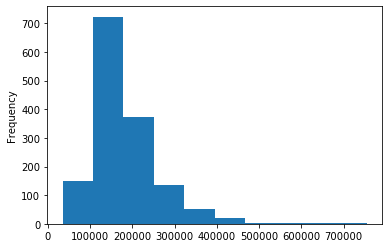

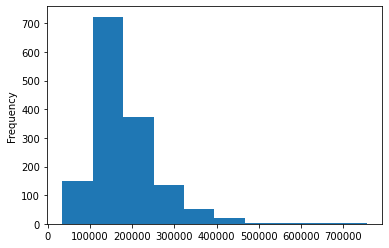

In [28]:
# Your code goes here
data_num.SalePrice.plot(kind = 'hist')
plt.show()

In [ ]:
# Your code goes here

In [ ]:
# Your code goes here

<b>Task 2.2</b> Explain what is the shape of your data, what distribution does it look like?
 (<span style="color:#00a0e5"> Опишите форму ваших данных, к какому распределению она подходит?</span>)

<p style="text-align:right; color:#1460AA;">+10
    points </p>

Наш график показывает что продажи домов у которых высокие цены очень низкие по своей логике так как не каждый человек может себе это позволить, низкие и средние имеют высокие результаты по ясным причинам среднестатистический человек может их себе позволить а о низких ценах, сама цена дает знать что не все так хорошо с домом.

In [ ]:
# Your answer goes here

<b>TASK 3</b> Visualizations

<b>Task 3.1</b> Visualize your categorical features and wrire down the summary (<span style="color:#00a0e5"> Визуализируйте ваши категориальные данные, напишите выводы по визуализациям</span>)

<p style="text-align:right; color:#1460AA;">+20
    points </p>

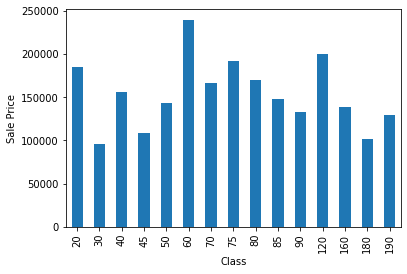

In [75]:
# Your code goes here
dataset.groupby([dataset['MSSubClass']])['SalePrice'].mean().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Sale Price')
plt.show()

График показывает что сколько стоит определенные классы здания. Класс здания не обещает что хороший будет стоить дорого.

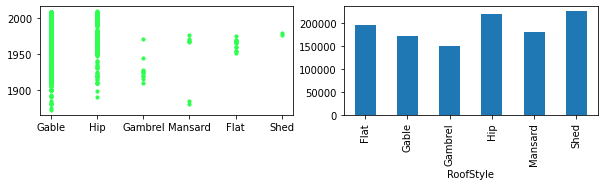

In [89]:
plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
plt.scatter(dataset.RoofStyle, dataset.YearBuilt, 40, marker = '.', color = '#2Ffd50')
plt.subplot(1, 2, 2)
dataset.groupby([dataset['RoofStyle']])['SalePrice'].mean().plot(kind='bar')
plt.show()

График говорит нам что Gable и Hip были с самого начала востребованными так как цена не такая высокая по сравнению с остальными

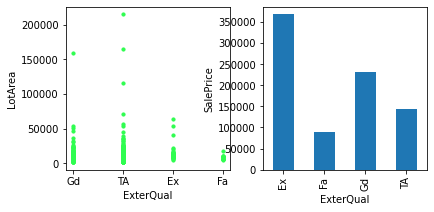

In [101]:
plt.figure(figsize=(10, 3))
plt.subplot(1, 3, 1)
plt.scatter(dataset.ExterQual, dataset.LotArea, 40, marker = '.', color = '#2Ffd50')
plt.xlabel('ExterQual')
plt.ylabel('LotArea')
plt.subplot(1, 3, 2)
dataset.groupby([dataset['ExterQual']])['SalePrice'].mean().plot(kind='bar')
plt.xlabel('ExterQual')
plt.ylabel('SalePrice')
plt.show()

График показывает взоимосвязь между качестовом наружного материала и площадью. График чаще всего использую материал TA 
так как его цена не такая дорогая

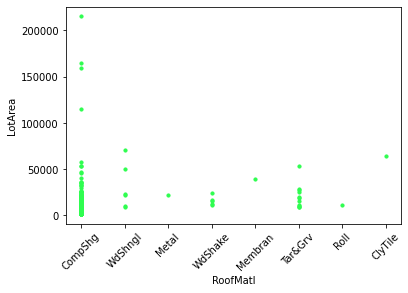

In [103]:
plt.scatter(dataset.RoofMatl, dataset.LotArea, 40, marker = '.', color = '#2Ffd50')
plt.xticks(rotation = '45')
plt.xlabel('RoofMatl')
plt.ylabel('LotArea')
plt.show()

График показывает что материал крыши не редко зависит от площади самого здания.

<b> Task 3.2 </b> Create boxplots for any 5 numerical features and investigate if there are possible outliers

<p style="text-align:right; color:#1460AA;">+20
    points </p>

Example, 

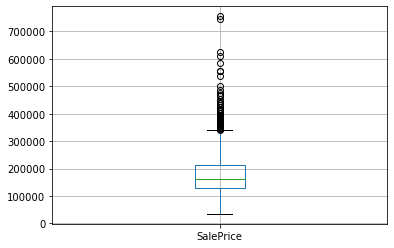

In [30]:
dataset.boxplot('SalePrice')

<AxesSubplot:>

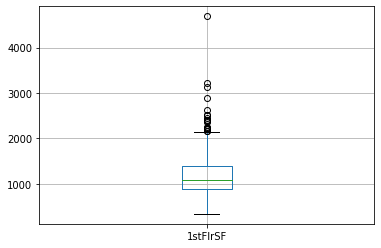

In [59]:
# Your code goes here
dataset_of_num.boxplot('1stFlrSF')

График говорит что обычно площадь первого этажа 1200-1400 в среднем, в редких случаях площадь большая что говорит например 
тоговые центры и тому подобное. А в жилых домах обычно примерно одинаковая площадь

<AxesSubplot:>

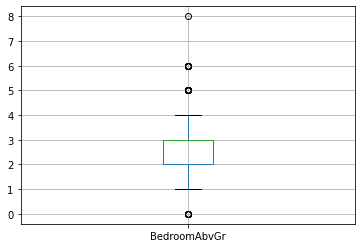

In [60]:
# Your code goes here
dataset_of_num.boxplot('BedroomAbvGr')

График показывает что в среднем в гараже распологают 2 или 3 спальни, но в редких случаях от 4 и выше что говорит о экономическом состоянии

<AxesSubplot:>

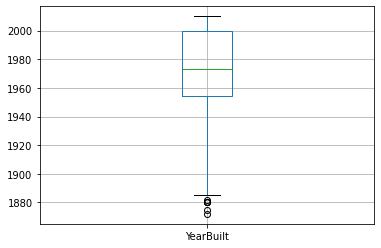

In [69]:
# Your code goes here
dataset_of_num.boxplot('YearBuilt')

На сегодняшний день основное число зданий у нас построено от 16

<b><span style="font-size:20px; color:orange">G</span>reat!</b> You did awesome job! <br/> <br/> But don't stop practicing, remember - since you will be working with data, you have to understand its nature.
<br/> <br/> <b>Now</b> go to the Quiz 04
<br/> 